In [1]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load Iris dataset
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully.\n")
except FileNotFoundError:
    print("The dataset file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.



In [3]:
# Display first few rows
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Data types and missing values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Data Types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# Clean dataset - drop rows with missing values (if any)
df_cleaned = df.dropna()
print(f"\nAfter cleaning, dataset shape: {df_cleaned.shape}")


After cleaning, dataset shape: (150, 5)


In [6]:
# Task 2: Basic Data Analysis

# Basic statistics
print("\nDescriptive statistics:\n", df_cleaned.describe())


Descriptive statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [7]:
# Group by species and compute mean of numerical columns
grouped = df_cleaned.groupby('target').mean()
print("\nMean values grouped by species (target):\n", grouped)


Mean values grouped by species (target):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  


In [8]:
# Map target number to species names for readability
df_cleaned['species'] = df_cleaned['target'].map(dict(enumerate(iris.target_names)))

In [9]:
# Insights:
print("\nInteresting Finding:")
print("Setosa has significantly smaller petal dimensions compared to Versicolor and Virginica.")



Interesting Finding:
Setosa has significantly smaller petal dimensions compared to Versicolor and Virginica.


In [10]:
# Task 3: Data Visualization
sns.set(style="whitegrid")

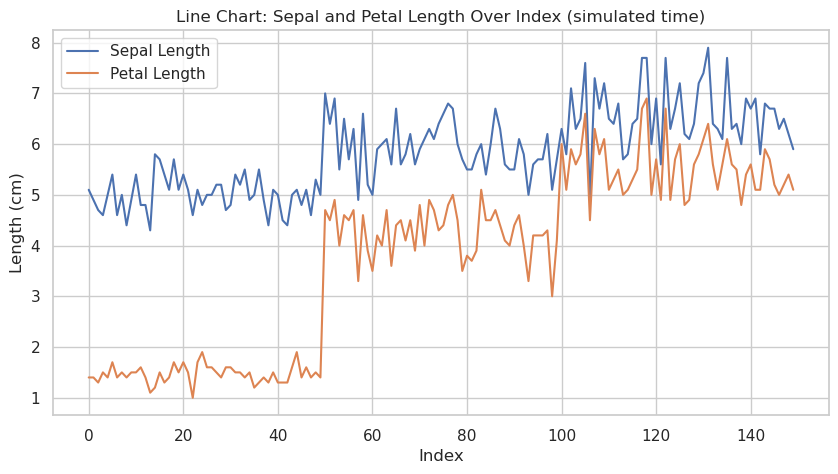

In [11]:
# 1. Line Chart - We'll simulate a time series using row index as 'day'
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned.index, df_cleaned['sepal length (cm)'], label='Sepal Length')
plt.plot(df_cleaned.index, df_cleaned['petal length (cm)'], label='Petal Length')
plt.title("Line Chart: Sepal and Petal Length Over Index (simulated time)")
plt.xlabel("Index")
plt.ylabel("Length (cm)")
plt.legend()
plt.show()



/tmp/ipykernel_13366/1694248796.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df_cleaned, ci=None)


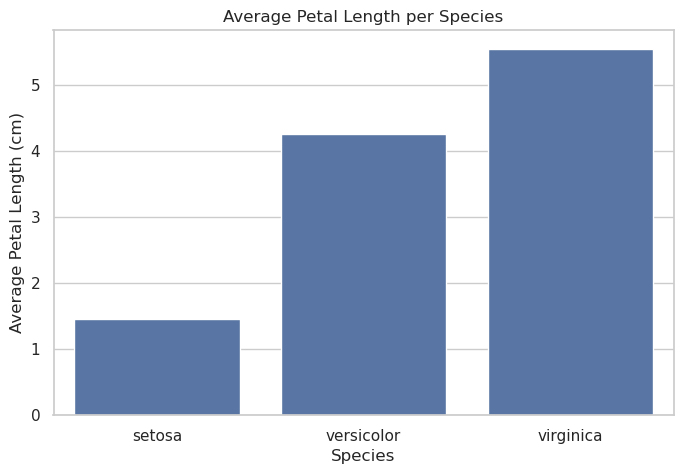

In [12]:
# 2. Bar Chart - Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df_cleaned, ci=None)
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

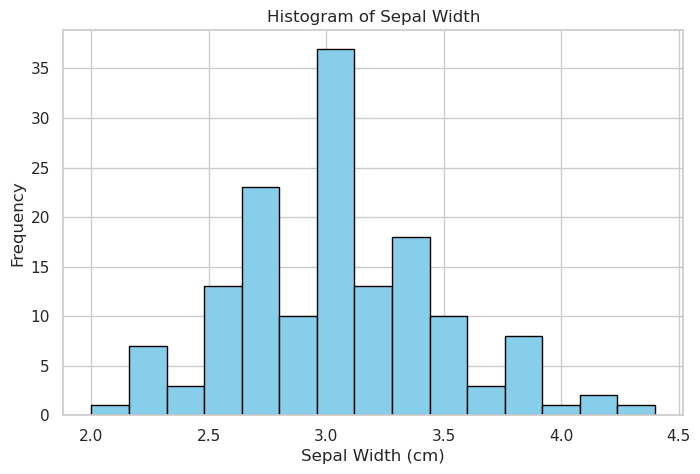

In [13]:
# 3. Histogram - Distribution of Sepal Width
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['sepal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# 4. Scatter Plot - Sepal Length vs. Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df_cleaned)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.show()